In [14]:
# dataset
# https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset?resource=download

In [1]:
!git clone https://github.com/stvschmdt/ne_ds5230.git

Cloning into 'ne_ds5230'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 307.99 KiB | 3.35 MiB/s, done.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv('ne_ds5230/cbb.csv')

In [6]:
data.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        2455 non-null   object 
 1   CONF        2455 non-null   object 
 2   G           2455 non-null   int64  
 3   W           2455 non-null   int64  
 4   ADJOE       2455 non-null   float64
 5   ADJDE       2455 non-null   float64
 6   BARTHAG     2455 non-null   float64
 7   EFG_O       2455 non-null   float64
 8   EFG_D       2455 non-null   float64
 9   TOR         2455 non-null   float64
 10  TORD        2455 non-null   float64
 11  ORB         2455 non-null   float64
 12  DRB         2455 non-null   float64
 13  FTR         2455 non-null   float64
 14  FTRD        2455 non-null   float64
 15  2P_O        2455 non-null   float64
 16  2P_D        2455 non-null   float64
 17  3P_O        2455 non-null   float64
 18  3P_D        2455 non-null   float64
 19  ADJ_T       2455 non-null  

In [7]:
data.POSTSEASON.unique()

array(['2ND', 'Champions', 'E8', 'F4', nan, 'R32', 'R64', 'R68', 'S16'],
      dtype=object)

In [9]:
data.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,...,2455.000000,2455.00000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,476.000000,2455.000000
mean,31.492464,16.284318,103.304481,103.304603,0.493957,49.805132,50.001385,18.763055,18.689572,29.875642,...,35.989776,36.26998,48.802281,48.976660,34.406395,34.598737,67.812301,-7.802485,8.802521,2016.007332
std,2.657401,6.610960,7.376981,6.605318,0.256244,3.143061,2.939602,2.090595,2.201749,4.134332,...,5.247820,6.24590,3.384468,3.340546,2.789434,2.415766,3.277622,6.965736,4.676354,1.999375
min,15.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,15.000000,...,21.600000,21.80000,37.700000,37.700000,24.900000,27.100000,57.200000,-25.200000,1.000000,2013.000000
25%,30.000000,11.000000,98.300000,98.500000,0.282200,47.750000,48.000000,17.300000,17.200000,27.100000,...,32.400000,31.90000,46.500000,46.700000,32.500000,33.000000,65.700000,-13.000000,5.000000,2014.000000
50%,31.000000,16.000000,103.000000,103.500000,0.475000,49.700000,50.000000,18.700000,18.600000,29.900000,...,35.800000,35.80000,48.700000,49.000000,34.400000,34.600000,67.800000,-8.300000,9.000000,2016.000000
75%,33.000000,21.000000,108.000000,107.900000,0.712200,51.900000,52.000000,20.100000,20.100000,32.600000,...,39.500000,40.20000,51.000000,51.300000,36.300000,36.200000,70.000000,-3.150000,13.000000,2018.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,59.800000,59.500000,27.100000,28.500000,43.600000,...,58.600000,60.70000,62.600000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2019.000000


In [10]:
data.groupby('TEAM').count()

,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
TEAM,,,,,,,,,,,,,,,,,,,,,
Abilene Christian,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,1,1,6
Air Force,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,0,0,7
Akron,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,1,1,7
Alabama,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,1,1,7
Alabama A&M,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wright St.,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,1,1,7
Wyoming,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,1,1,7
Xavier,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,5,5,7


In [11]:
data.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [12]:
averages = data[['CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB']].groupby('CONF').mean()

array([[<Axes: title={'center': 'G'}>, <Axes: title={'center': 'W'}>,
        <Axes: title={'center': 'ADJOE'}>,
        <Axes: title={'center': 'ADJDE'}>],
       [<Axes: title={'center': 'BARTHAG'}>,
        <Axes: title={'center': 'EFG_O'}>,
        <Axes: title={'center': 'EFG_D'}>,
        <Axes: title={'center': 'TOR'}>],
       [<Axes: title={'center': 'TORD'}>,
        <Axes: title={'center': 'ORB'}>, <Axes: title={'center': 'DRB'}>,
        <Axes: title={'center': 'FTR'}>],
       [<Axes: title={'center': 'FTRD'}>,
        <Axes: title={'center': '2P_O'}>,
        <Axes: title={'center': '2P_D'}>,
        <Axes: title={'center': '3P_O'}>],
       [<Axes: title={'center': '3P_D'}>,
        <Axes: title={'center': 'ADJ_T'}>,
        <Axes: title={'center': 'WAB'}>, <Axes: >]], dtype=object)

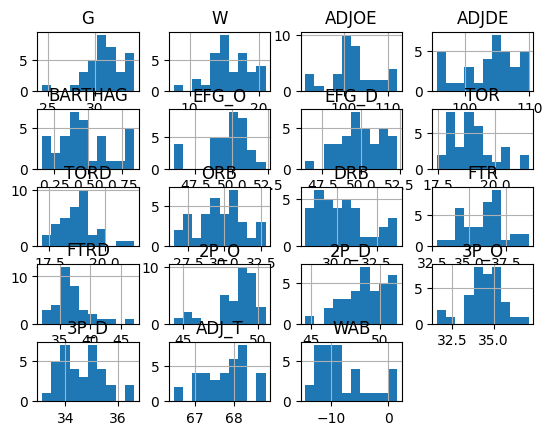

In [13]:
averages.hist()

In [14]:
first_rounds = data[(data.POSTSEASON =='R64') | (data.POSTSEASON == 'R32')]

In [15]:
final_four = data[(data.POSTSEASON =='2ND') | (data.POSTSEASON == 'Champions') | (data.POSTSEASON == 'F4') | (data.POSTSEASON == 'E8') | (data.POSTSEASON == 'S16')]

In [16]:
final_four

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,...,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,...,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,...,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013


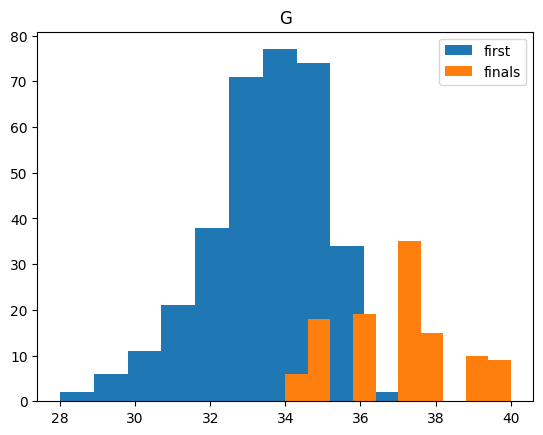

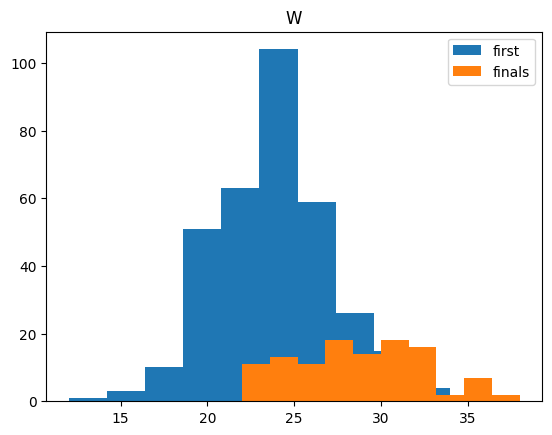

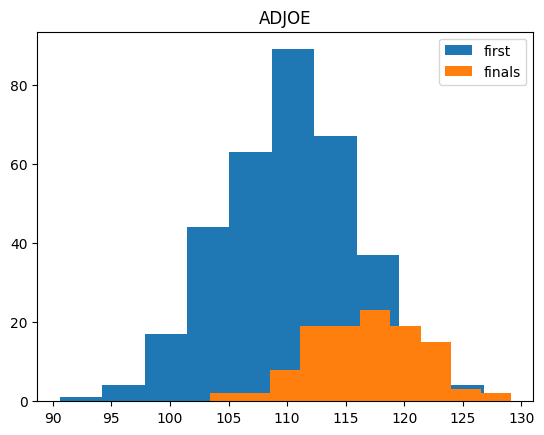

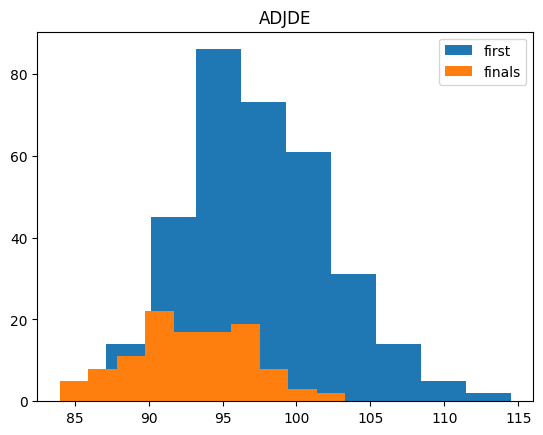

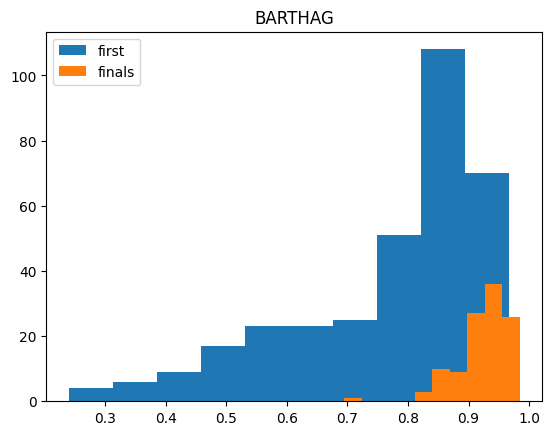

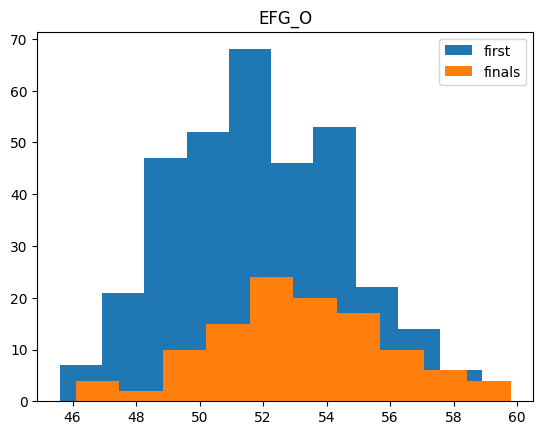

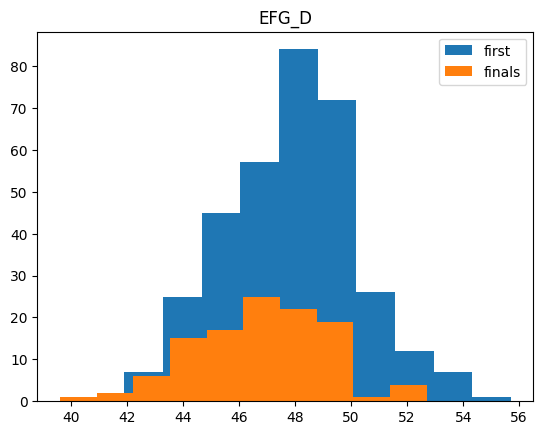

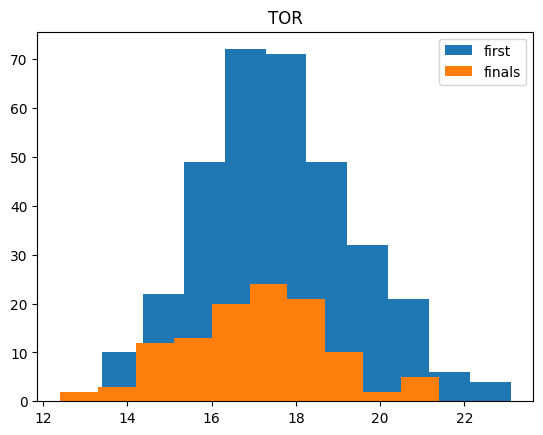

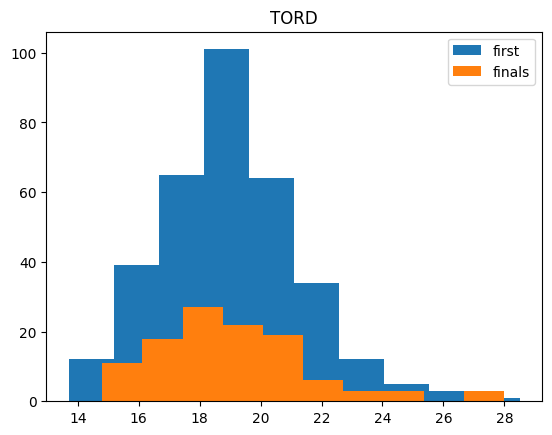

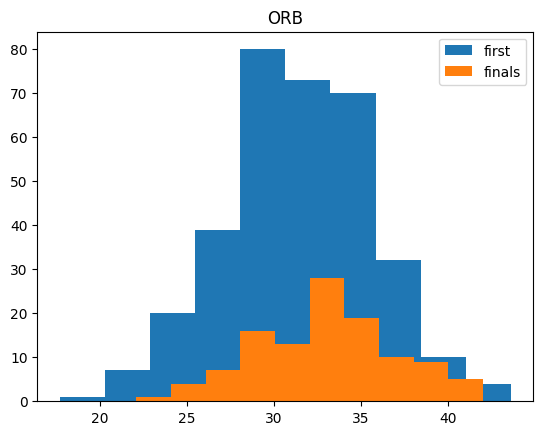

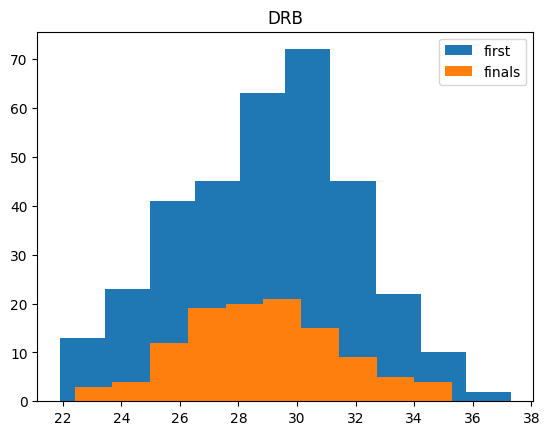

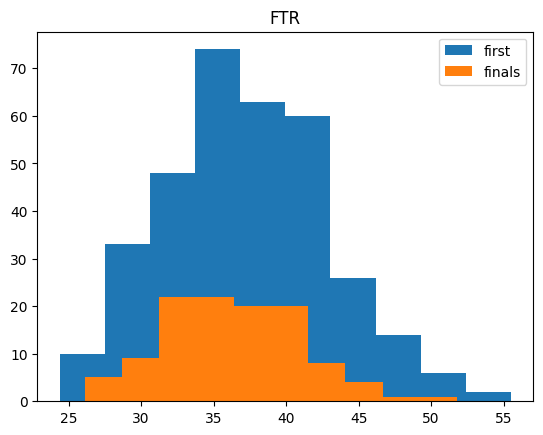

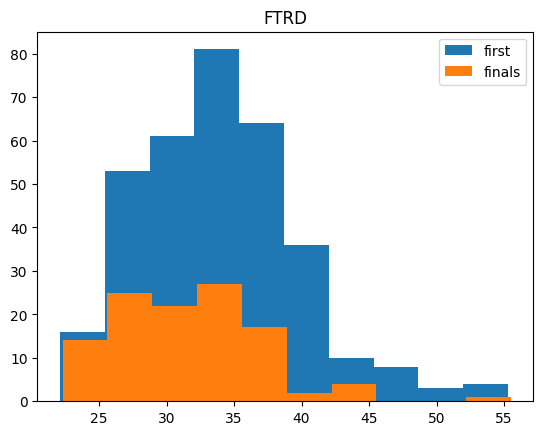

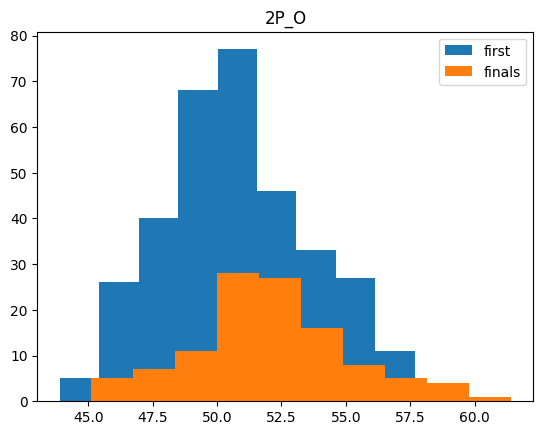

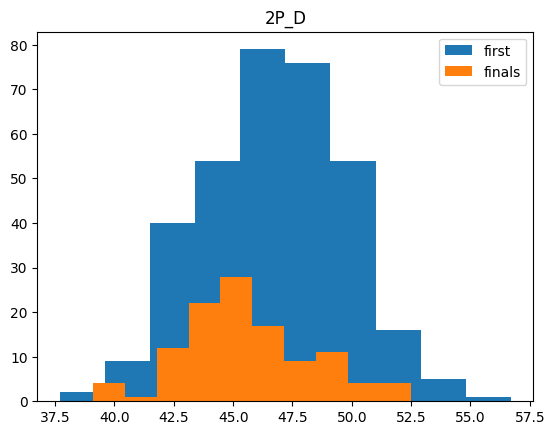

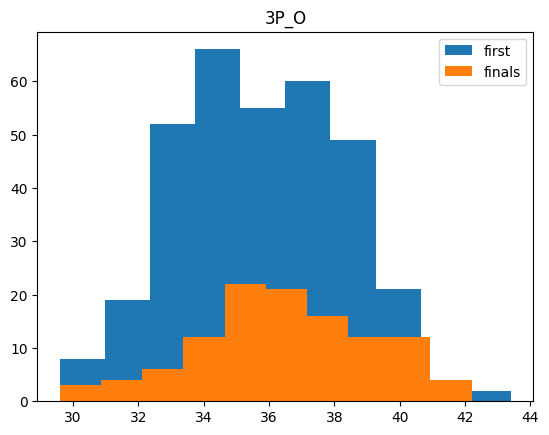

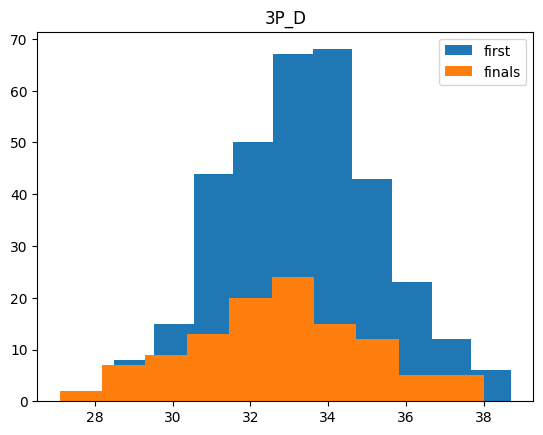

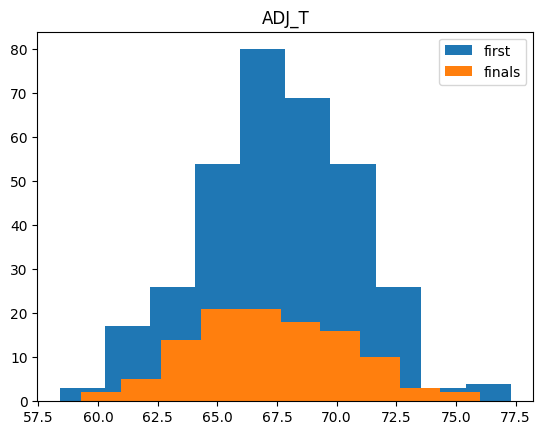

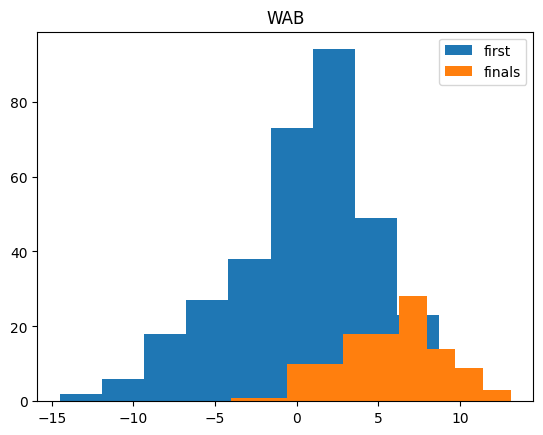

In [17]:
numerics = ['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB']
for col in numerics:
    plt.hist(first_rounds[col], label='first')
    plt.hist(final_four[col], label='finals')
    plt.legend()
    plt.title('{}'.format(col))
    plt.show()

In [18]:
first_rounds[numerics].mean() - final_four[numerics].mean()

G         -3.342262
W         -4.970238
ADJOE     -6.720536
ADJDE      4.436607
BARTHAG   -0.152217
EFG_O     -1.293750
EFG_D      1.076786
TOR        0.646726
TORD      -0.144048
ORB       -1.658333
DRB        0.144048
FTR        0.826488
FTRD       2.384226
2P_O      -1.368155
2P_D       1.165774
3P_O      -0.765476
3P_D       0.541667
ADJ_T      0.274405
WAB       -5.262500
dtype: float64

In [19]:
first_rounds[numerics].std() - final_four[numerics].std()

G          0.116069
W         -0.301342
ADJOE      0.821499
ADJDE      1.035452
BARTHAG    0.115285
EFG_O     -0.150681
EFG_D     -0.037103
TOR        0.025041
TORD      -0.229617
ORB        0.233730
DRB        0.336988
FTR        0.821394
FTRD       0.492414
2P_O      -0.127865
2P_D       0.237594
3P_O      -0.102064
3P_D      -0.359123
ADJ_T      0.012292
WAB        1.171843
dtype: float64

In [20]:
best_adjoe = final_four[numerics].mean()['ADJOE']